# **OVERVIEW**


In this project, we analyze the iFood dataset, which contains demographic, behavioral, and transactional information about customers. The dataset includes variables such as income, age, household composition, product purchases, and channel preferences.

**The goal of this project is to:**

Clean and preprocess the dataset to ensure accuracy and consistency.

Apply K-Means clustering to identify distinct customer groups.

Validate the optimal number of clusters using the Elbow Method and Silhouette Analysis.

Profile each cluster to uncover differences in spending, demographics, and purchasing behavior.

Perform RFM (Recency, Frequency, Monetary) analysis to complement clustering with rule-based segmentation.

Translate analytical findings into business insights and marketing recommendations.



# **Core Libraries & Setup**

In [ ]:
# Core Libraries
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning & Clustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Optional (for dimensionality reduction & visualization)
from sklearn.decomposition import PCA


# **Uploading and loading the dataset.**

In [ ]:
from google.colab import files

# Upload the file
uploaded = files.upload()


Saving ifood_df.csv to ifood_df.csv


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("ifood_df.csv")


# **Data Exploration & Cleaning**

In [ ]:
# Quick check
print("Shape of dataset:", df.shape)
df.head()

Shape of dataset: (2205, 39)


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [ ]:
# Missing values
print(df.isnull().sum())



Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

In [ ]:
print("Duplicate rows:", df.duplicated().sum())
df = df.drop_duplicates()


Duplicate rows: 184


In [ ]:
# Check duplicates
print("Duplicate rows:", df.duplicated().sum())

# Remove duplicates
df = df.drop_duplicates()

# Verify
print("After removal:", df.duplicated().sum())
print("New shape:", df.shape)


Duplicate rows: 0
After removal: 0
New shape: (2021, 40)


# Summary statistics

In [ ]:
# Summary statistics for all numeric columns
df.describe().round(2)


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,MntTotal,MntRegularProds,AcceptedCmpOverall,Cluster,RFM_Score,Frequency,Monetary,R_rank,F_rank,M_rank
count,2021.00,2021.00,2021.00,2021.00,2021.00,2021.00,2021.00,2021.00,2021.00,2021.00,...,2021.00,2021.00,2021.00,2021.00,2021.00,2021.00,2021.00,2021.00,2021.00,2021.00
mean,51687.26,0.44,0.51,48.88,306.49,26.36,166.06,37.60,27.27,43.92,...,563.79,519.87,0.30,0.78,3033.00,12.57,563.79,1011.00,1011.00,1011.00
std,20713.05,0.54,0.55,28.95,337.60,39.78,219.87,54.89,41.58,51.68,...,576.78,554.80,0.68,0.82,1272.75,7.16,576.78,583.52,582.69,583.55
min,1730.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,4.00,-283.00,0.00,0.00,201.50,0.00,4.00,13.50,1.50,1.00
25%,35416.00,0.00,0.00,24.00,24.00,2.00,16.00,3.00,1.00,9.00,...,55.00,42.00,0.00,0.00,2034.00,6.00,55.00,501.00,546.00,505.50
50%,51412.00,0.00,0.00,49.00,178.00,8.00,68.00,12.00,8.00,25.00,...,343.00,288.00,0.00,1.00,2962.50,12.00,343.00,1007.00,1032.00,1012.00
75%,68274.00,1.00,1.00,74.00,507.00,33.00,230.00,50.00,34.00,56.00,...,964.00,883.00,0.00,1.00,4058.50,18.00,964.00,1519.50,1470.00,1519.00
max,113734.00,2.00,2.00,99.00,1493.00,199.00,1725.00,259.00,262.00,321.00,...,2491.00,2458.00,4.00,2.00,5922.00,32.00,2491.00,2015.00,2019.50,2021.00


In [ ]:
# Average purchase value
avg_purchase = df['MntTotal'].mean()
print("Average Purchase Value:", round(avg_purchase, 2))

# Frequency of purchases (sum of web, catalog, and store purchases)
df['Frequency'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']
print("Average Frequency:", round(df['Frequency'].mean(), 2))

# Average recency (days since last purchase)
print("Average Recency:", round(df['Recency'].mean(), 2))


Average Purchase Value: 563.79
Average Frequency: 12.57
Average Recency: 48.88


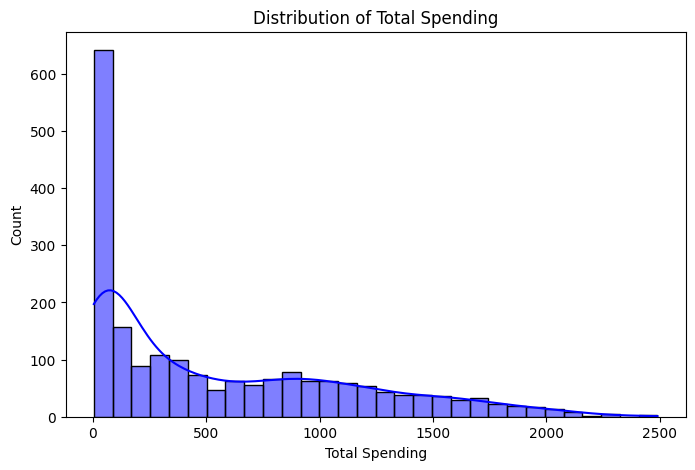

In [ ]:
# Spending distribution
plt.figure(figsize=(8,5))
sns.histplot(df['MntTotal'], bins=30, kde=True, color='blue')
plt.title("Distribution of Total Spending")
plt.xlabel("Total Spending")
plt.ylabel("Count")
plt.show()




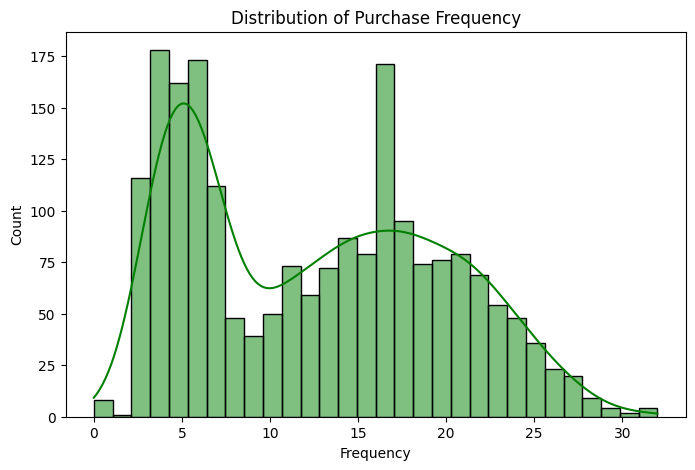

In [ ]:
# Frequency distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Frequency'], bins=30, kde=True, color='green')
plt.title("Distribution of Purchase Frequency")
plt.xlabel("Frequency")
plt.ylabel("Count")
plt.show()



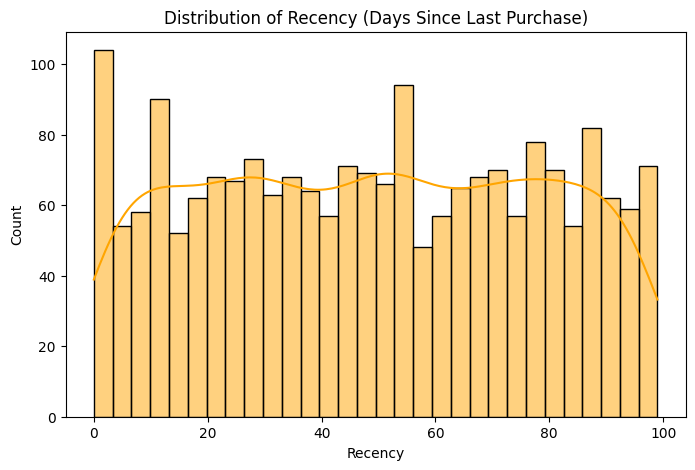

In [ ]:
# Recency distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Recency'], bins=30, kde=True, color='orange')
plt.title("Distribution of Recency (Days Since Last Purchase)")
plt.xlabel("Recency")
plt.ylabel("Count")
plt.show()

# **Feature Selection**

In [ ]:
# Strip column names of trailing spaces (if any)
df.columns = df.columns.str.strip()

# Select relevant features
features = df[['Income', 'Age', 'Kidhome', 'Teenhome',
               'MntWines', 'MntMeatProducts', 'MntFishProducts',
               'MntFruits', 'MntSweetProducts', 'MntGoldProds',
               'MntTotal', 'NumWebPurchases', 'NumCatalogPurchases',
               'NumStorePurchases', 'NumWebVisitsMonth', 'Recency']]




# **Data Preprocessing**

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Fit and transform features
scaled_features = scaler.fit_transform(features)

# Convert back to DataFrame for readability
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)

scaled_df.head()


,Income,Age,Kidhome,Teenhome,MntWines,MntMeatProducts,MntFishProducts,MntFruits,MntSweetProducts,MntGoldProds,MntTotal,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Recency
0,0.311511,1.018689,-0.827038,-0.932982,0.973297,1.728456,2.448975,1.549924,1.461111,0.853147,1.673874,1.411131,2.628352,-0.559667,0.684158,0.315068
1,-0.258030,1.275875,1.038412,0.897655,-0.875480,-0.728158,-0.648771,-0.637837,-0.631988,-0.733988,-0.941308,-1.131636,-0.587732,-1.178932,-0.140340,-0.375927
2,0.962228,0.332861,-0.827038,-0.932982,0.354075,-0.177695,1.337431,0.569203,-0.150816,-0.037197,0.295180,1.411131,-0.230390,1.298128,-0.552589,-0.790525
3,-1.209260,-1.295981,1.038412,-0.932982,-0.875480,-0.664468,-0.502995,-0.562397,-0.583871,-0.753344,-0.894484,-0.768384,-0.945075,-0.559667,0.271909,-0.790525
4,0.318996,-1.038796,1.038412,-0.932982,-0.395509,-0.218638,0.152998,0.418323,-0.006464,-0.559791,-0.271905,0.321373,0.126953,0.059598,-0.140340,1.558860


# **Cluster Validation**

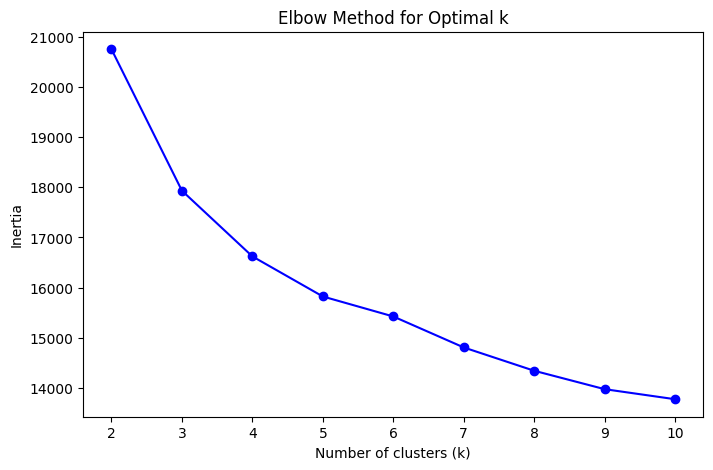

In [ ]:
inertia = []
K = range(2, 11)  # test clusters from 2 to 10

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_df)
    score = silhouette_score(scaled_df, labels)
    print(f"For k={k}, Silhouette Score={score:.3f}")


For k=2, Silhouette Score=0.337
For k=3, Silhouette Score=0.250
For k=4, Silhouette Score=0.172
For k=5, Silhouette Score=0.166
For k=6, Silhouette Score=0.145
For k=7, Silhouette Score=0.143
For k=8, Silhouette Score=0.156
For k=9, Silhouette Score=0.127
For k=10, Silhouette Score=0.118


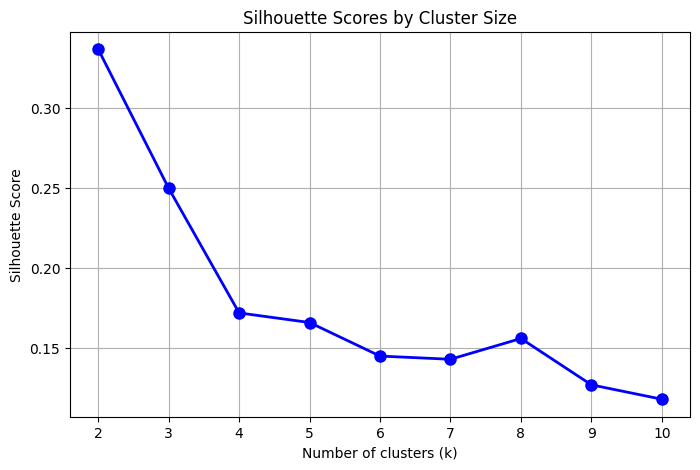

In [ ]:
import matplotlib.pyplot as plt

# Silhouette scores from your results
k_values = [2, 3, 4, 5, 6, 7, 8, 9, 10]
silhouette_scores = [0.337, 0.250, 0.172, 0.166, 0.145, 0.143, 0.156, 0.127, 0.118]

# Plot line chart
plt.figure(figsize=(8,5))
plt.plot(k_values, silhouette_scores, 'bo-', linewidth=2, markersize=8)
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores by Cluster Size")
plt.xticks(k_values)
plt.grid(True)
plt.show()


# **K-Means Clustering**

In [ ]:
# Apply K-Means with optimal k
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_df)

# Preview cluster assignments
df[['Income', 'Age', 'MntTotal', 'Recency', 'Cluster']].head()


,Income,Age,MntTotal,Recency,Cluster
0,58138.0,63,1529,58,2
1,46344.0,66,21,38,0
2,71613.0,55,734,26,1
3,26646.0,36,48,26,0
4,58293.0,39,407,94,0


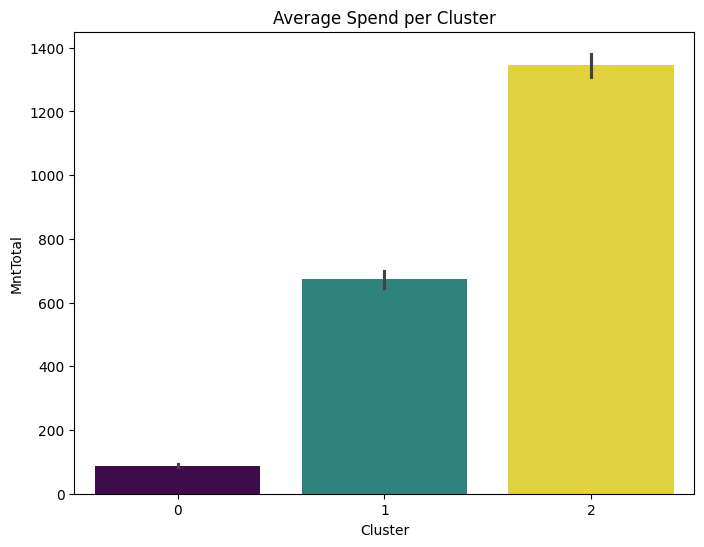

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x='Cluster', y='MntTotal', hue='Cluster', data=df, palette='viridis', legend=False)
plt.title('Average Spend per Cluster')
plt.xlabel('Cluster')
plt.ylabel('MntTotal')
plt.show()



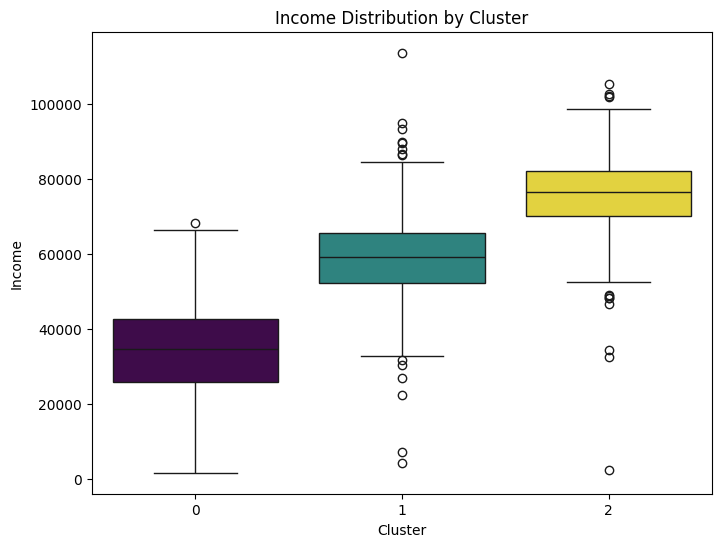

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Cluster', y='Income', hue='Cluster', data=df, palette='viridis', legend=False)
plt.title('Income Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Income')
plt.show()


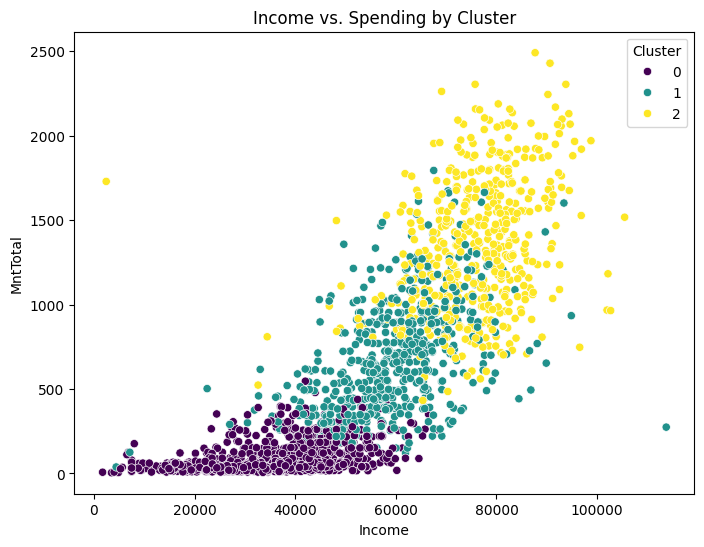

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Income', y='MntTotal', data=df, hue='Cluster', palette='viridis')
plt.title('Income vs. Spending by Cluster')
plt.xlabel('Income')
plt.ylabel('MntTotal')
plt.legend(title='Cluster')
plt.show()


# **Cluster Profiling**

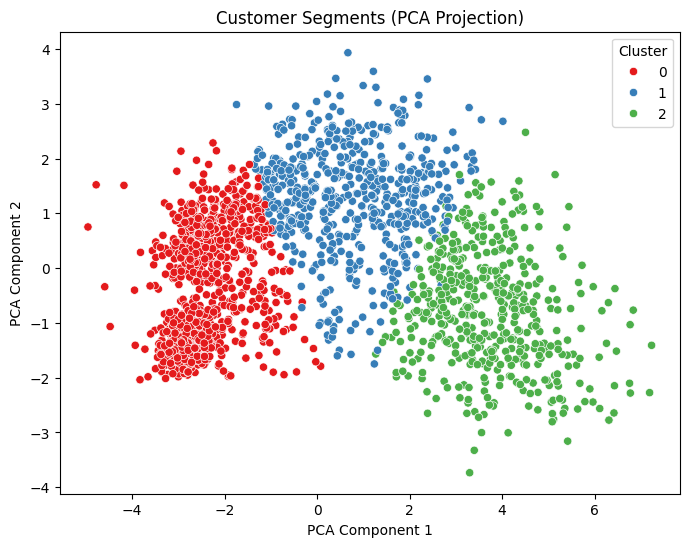

In [ ]:
from sklearn.decomposition import PCA

# Reduce to 2D for plotting
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_df)

# Plot clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_components[:,0], y=pca_components[:,1], hue=df['Cluster'], palette='Set1')
plt.title("Customer Segments (PCA Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


In [ ]:
cluster_profile = df.groupby('Cluster')[['Income','Age','MntTotal','Recency']].mean().round(2)
cluster_profile['Count'] = df['Cluster'].value_counts().sort_index()
cluster_profile


,Income,Age,MntTotal,Recency,Count
Cluster,,,,,
0,34426.07,47.94,88.32,49.14,947
1,59158.96,56.18,672.56,47.74,578
2,75936.67,51.28,1344.84,49.72,496


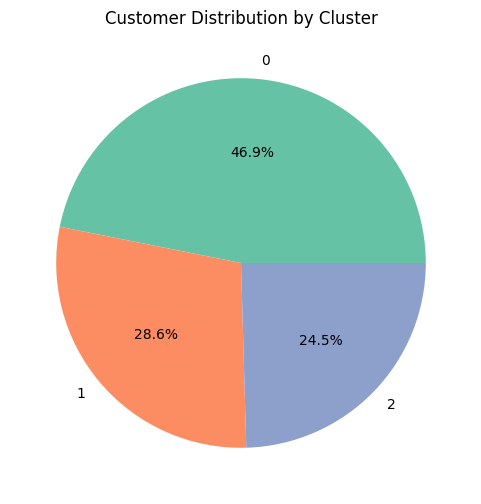

In [ ]:
# Pie chart: Customer Distribution
plt.figure(figsize=(6,6))
plt.pie(cluster_profile['Count'], labels=cluster_profile.index, autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.title("Customer Distribution by Cluster")
plt.show()

# **RFM Analysis**

In [ ]:
df['RFM_Score'] = df['Recency'].rank(ascending=False) + \
                  df['NumWebPurchases'].rank(ascending=True) + \
                  df['MntTotal'].rank(ascending=True)


In [ ]:
product_profile = df.groupby('Cluster')[['MntWines','MntMeatProducts','MntFruits','MntSweetProducts']].mean()


In [ ]:
# Calculate RFM metrics
df['Frequency'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']
df['Monetary'] = df['MntTotal']
df['Recency'] = df['Recency']  # already in dataset


# Corrected RFM ranking and score
df['Frequency'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']
df['Monetary'] = df['MntTotal']
df['Recency'] = df['Recency']  # already present

df['R_rank'] = df['Recency'].rank(ascending=True)     # lower days = more recent → better
df['F_rank'] = df['Frequency'].rank(ascending=False)  # higher frequency → better
df['M_rank'] = df['Monetary'].rank(ascending=False)   # higher spend → better

df['RFM_Score'] = df['R_rank'] + df['F_rank'] + df['M_rank']


# Preview
df[['Recency','Frequency','Monetary','RFM_Score']].head()


,Recency,Frequency,Monetary,RFM_Score
0,58,22,1529,1618.0
1,38,4,21,4470.5
2,26,20,734,1625.0
3,26,6,48,3587.0
4,94,14,407,3739.5


In [ ]:
def rfm_segment(score):
    if score <= df['RFM_Score'].quantile(0.25):
        return 'Best Customers'
    elif score <= df['RFM_Score'].quantile(0.50):
        return 'Loyal Customers'
    elif score <= df['RFM_Score'].quantile(0.75):
        return 'At Risk'
    else:
        return 'Inactive'

df['RFM_Segment'] = df['RFM_Score'].apply(rfm_segment)

# Distribution
df['RFM_Segment'].value_counts()


,count
RFM_Segment,
Best Customers,506
Inactive,505
At Risk,505
Loyal Customers,505


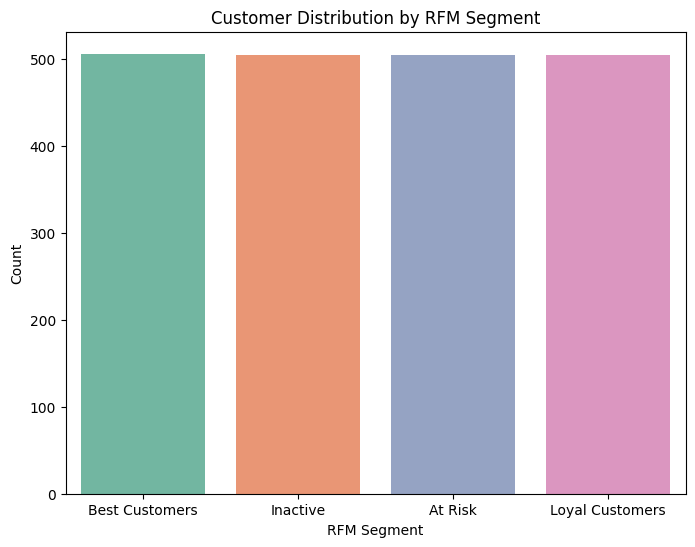

In [ ]:
 plt.figure(figsize=(8,6))
 sns.countplot(x='RFM_Segment', hue='RFM_Segment', data=df, palette='Set2', legend=False)
 plt.title('Customer Distribution by RFM Segment')
 plt.xlabel('RFM Segment')
 plt.ylabel('Count')
 plt.show()

# **Insights**

**Cluster Profiles**

Cluster 0 (947 customers)

Income: ~34K (lowest)

Spending: ~88 (very low)

Age: ~48

Recency: ~49 days

This is a large, price-sensitive mass segment. They spend little but form nearly half of the customer base.

Cluster 1 (578 customers)

Income: ~59K (mid-level)

Spending: ~673 (moderate)

Age: ~56 (older group)

Recency: ~48 days

This is a stable, mid-spend segment with potential loyalty. They are older, steady buyers.

Cluster 2 (496 customers)

Income: ~76K (highest)

Spending: ~1345 (highest)

Age: ~51

Recency: ~50 days

This is the VIP segment — high-income, high-spend customers who drive profitability.

**RFM Segments**

Best Customers (506): Recent, frequent, high spenders

Loyal Customers (505): Frequent buyers, moderate spend

At Risk (505): Engagement slipping, need reactivation

Inactive (505): Long recency, low spend, low frequency

Distribution is balanced across segments, showing clear opportunities for targeted retention and reactivation.

**Descriptive Stats**

Average Purchase Value: 563.79

Average Frequency: 12.57 purchases

Average Recency: 48.88 days

Customers are moderately engaged, but recency (~49 days) suggests risk of churn if not re-engaged.

**Recommendations**

Cluster-Based

Cluster 0 (Low-income, low-spend): Entry-level bundles, discounts, referral incentives, store promotions, reactivation campaigns

Cluster 1 (Mid-income, moderate spend): Loyalty programs, curated packs, subscription offers, personalized recommendations

Cluster 2 (High-income, VIPs): Premium editions, exclusives, early access, VIP concierge, experiential events

RFM-Based

Best Customers: Surprise-and-delight rewards, exclusive previews, double points
Loyal Customers: Upsell to premium categories, gamified loyalty milestones
At Risk: Win-back campaigns, personalized discounts, free shipping
Inactive: Low-cost seasonal campaigns, automated nurture flows

Cross-Cutting

Personalization: Tailor bundles by product category
Channel Allocation: Cluster 0 - store/web discounts, Cluster 1 - catalog/email, Cluster 2 - direct VIP communication
Pricing Strategy: Cluster 0 - price-led, Cluster 1 - value-convenience, Cluster 2 - premium experience-led
Measurement: Track uplift in CTR, conversion, AOV, and repeat rate by segment

**Business Impact**

Revenue Growth: Focus on VIPs and upselling loyal customers

Retention: Reduce churn by re-engaging at-risk and inactive customers

Efficiency: Optimize marketing spend by tailoring offers to segment behavior

Scalability: Balanced RFM distribution allows systematic targeting across all customer types
